In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from numpy.linalg import inv


In [2]:
z = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
z = z.reshape(-1) # 将所有元素reshape到dimension 1
z

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [3]:
a = np.ones((6))
b = np.ones((6, 1))
a
b

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [4]:
z = z.reshape(-1, 1)
z

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12]])

a) Make up some data

In [5]:
x = np.array([-5, -3.2, -1.1, 0.5, 2.6, 4.4]).T # 把矩阵变为transpose form
r = np.array([12, 9, 3, 0.8, -1, -7]).T

Double-click(or enter) to edit

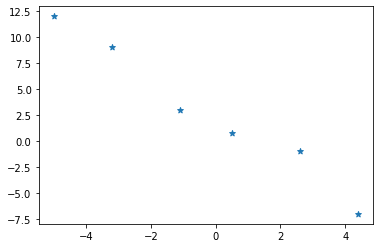

In [6]:
plt.scatter(x, r, marker="*")

b) Do a plot of the data
    Have a look at the data
    Guess a linear regression model to fit the data
    e.g., y = -x + 1

d) Make the plot of your guess model

modelx =  [-5.0, -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4.0, -3.9, -3.8, -3.7, -3.5999999999999996, -3.5, -3.4, -3.3, -3.2, -3.0999999999999996, -3.0, -2.9, -2.8, -2.6999999999999997, -2.5999999999999996, -2.5, -2.4, -2.3, -2.1999999999999997, -2.0999999999999996, -2.0, -1.9, -1.7999999999999998, -1.6999999999999997, -1.5999999999999996, -1.5, -1.4, -1.2999999999999998, -1.1999999999999997, -1.0999999999999996, -1.0, -0.8999999999999995, -0.7999999999999998, -0.7000000000000002, -0.5999999999999996, -0.5, -0.39999999999999947, -0.2999999999999998, -0.1999999999999993, -0.09999999999999964, 0.0, 0.10000000000000053, 0.20000000000000018, 0.3000000000000007, 0.40000000000000036, 0.5, 0.6000000000000005, 0.7000000000000002, 0.8000000000000007, 0.9000000000000004, 1.0, 1.1000000000000005, 1.2000000000000002, 1.3000000000000007, 1.4000000000000004, 1.5, 1.6000000000000005, 1.7000000000000002, 1.8000000000000007, 1.9000000000000004, 2.0, 2.1000000000000005, 2.2, 2.300000000000

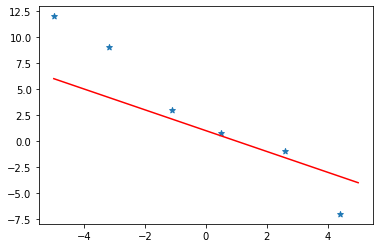

In [7]:
modelx = [-5 + i*0.1 for i in range(101)]
modely = -np.array(modelx) + 1
print("modelx = ", modelx)
print("modely = ", modely)
plt.scatter(x, r, marker="*")
plt.plot(modelx, modely, color = "red")

% The parameters of this model are: \beta_0 = 1, \beta_1 = -1. But it's not % a great fit to the data. % Train the model - minimize SSE (aka least sequares) % To do this we need a "dummy input" for \beta_0

In [8]:
dummy_input = np.ones((6)).T # imput of the element would be one
x2 = np.array([[ii, jj] for ii, jj in zip(dummy_input, x)])
print(x2)
beta = np.matmul(x2.T, x2) # 矩阵相乘
beta = inv(beta) # inverse matrix
beta = np.matmul(beta, x2.T)
beta = np.matmul(beta, r) #以上四个步骤相当于beta = (x.T * x)-1*x.T*y这个公式(只用于linear regression)
print(beta)

[[ 1.  -5. ]
 [ 1.  -3.2]
 [ 1.  -1.1]
 [ 1.   0.5]
 [ 1.   2.6]
 [ 1.   4.4]]
[ 2.2216763  -1.92774566]


One line code using sklearn to realize above code

In [9]:
reg = LinearRegression().fit(np.array(x).reshape(-1, 1), np.array(r).reshape(-1, 1)) # fit()用来训练模型
print(reg.coef_, reg.intercept_) # beta_0就是intercept，coefficient指的是beta_1到最后一个beta

[[-1.92774566]] [2.2216763]


In [10]:
trmodely = beta[0] + np.multiply(beta[1], modelx)

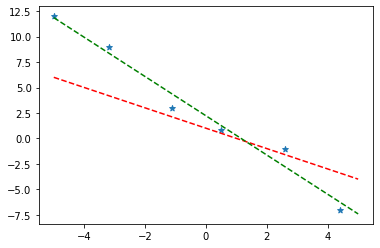

In [11]:
plt.scatter(x, r, marker="*")
plt.plot(modelx, modely, color="red", linestyle="dashed")
plt.plot(modelx, trmodely, color="green", linestyle="dashed")

In [12]:
ypred = beta[0] + np.multiply(beta[1], x)
ypred

array([11.86040462,  8.39046243,  4.34219653,  1.25780347, -2.79046243,
       -6.26040462])

In [13]:
ypred = reg.predict(np.array(x).reshape(-1, 1)) # 相当于直接将上一个cell的公式运算了
ypred

array([[11.86040462],
       [ 8.39046243],
       [ 4.34219653],
       [ 1.25780347],
       [-2.79046243],
       [-6.26040462]])

In [14]:
sse = np.sum((r - ypred) ** 2)
sse # sum square error

2814.270867052023

In [15]:
ypredguess = 1 - x
ypredguess

array([ 6. ,  4.2,  2.1,  0.5, -1.6, -3.4])

In [16]:
sseguess = sum((r - ypredguess) ** 2)
sseguess

73.26

Question 2

In [17]:
import pandas as pd
data = pd.read_csv("pokemonfun.csv").dropna().values
X, y = data[:,:7], data[:,7:8] # X取前7列，y取第八列
print(X.shape, y.shape)

(781, 7) (781, 1)


In [18]:
reg = LinearRegression().fit(X, y)
print("coef", reg.coef_)
print("intercept", reg.intercept_)

coef [[ 2.42199326e-01  6.48862786e-01  4.89344485e+01  5.79461300e-01
  -2.82868063e-02  2.37393434e-02 -3.70005603e-01]]
intercept [-76.96731514]


In [19]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = reg.predict(X)
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_pred, y))

Mean squared error: 6415.62
Coefficient of determination: -0.16


https://archive.ics.uci.edu/ml/datasets/iris iris dataset -> click on the link to see the caharacteristics of the dataset

In [20]:
import numpy as pd
import matplotlib.pyplot as plt
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the datasets
names = ["sepal-length", 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

To see what the dataset actually looks like

In [21]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


The next steps is to split our dataset into its attributes and labels. To do so, use the following code:

In [22]:
X = dataset.iloc[:,:-1].values # 除了最后一列的数据
y = dataset.iloc[:,4].values # 第四列的数据

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1235) # random_state是为了记录这个split的结果，方便以后测试时候还能得到这个结果

The gradient descent algorithm(which is used in neural network training and other machine learning algotithms) also converges fatser with normalized features.
The following script performs feature scaling

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train) # Perform standardization by centering and scaling
X_test = scaler.transform(X_test)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5) # most important part
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
y_pred = classifier.predict(X_test) # prediction of the test data

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score # 可以额外判断下一cell的东西(自己尝试)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [28]:
error = []

# Calculating error for K values between 1 and 100
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test) # prediction number
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

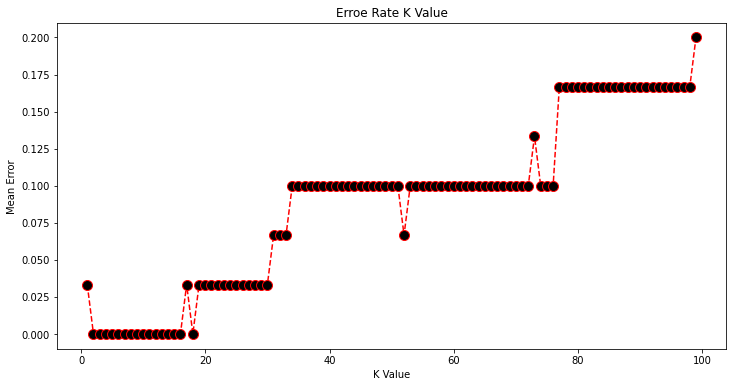

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), error, color="red", linestyle="dashed", marker="o", markerfacecolor="black", markersize=10)
plt.title("Erroe Rate K Value")
plt.xlabel("K Value")
plt.ylabel("Mean Error")